## Часть 1. Пример проблемы использования метода Гаусса для решения СЛАУ

Перед вами простая реализация метода Гаусса для решения СЛАУ. Далее по коду представлены две СЛАУ $A_1x = b_1$ и $A_2x = b_2$, эквивалентные с точностью до перестановки строк. Эти СЛАУ решаются сначала пакетным методом, затем реализованным методом Гаусса. Для пакетного метода получается два одинаковых решения. Для метода Гаусса - два отличающихся решения. ЗАДАНИЕ: необходимо объяснить, почему для представленного метода Гаусса решения различаются.

In [1]:
import numpy as np
import numpy.linalg as la
import copy 

def gauss( A_in, b_in ):
    n = b_in.size
    A = copy.deepcopy(A_in)
    b = copy.deepcopy(b_in)
    for k in range(0,n-1):
        for i in range(k+1,n):
            if A[i,k]!=0:
                c = A[i,k]/A[k,k]
                A[i,k+1:n] = A[i,k+1:n] - c*A[k,k+1:n]
                b[i] = b[i] - c*b[k]
                
    # обратный ход
    for k in range(n-1,-1,-1):
        b[k] = (b[k] - np.dot(A[k,k+1:n],b[k+1:n]))/A[k,k]
    return b

In [2]:
A1 = np.array([[1e-16, 1., -1.], [-1., 2., -1.], [2., -1., 0.]])
b1 = np.array([0., 0., 1.])

A2 = np.array([[2., -1., 0.], [-1., 2., -1.], [1e-16, 1., -1.]])
b2 = np.array([1., 0., 0.])

print('mu1 = ', la.cond(A1))
print('mu2 = ', la.cond(A2))

mu1 =  16.393731622284385
mu2 =  16.393731622284392


In [3]:
print('u1 = ', la.solve(A1, b1))
print('u2 = ',la.solve(A2, b2))

u1 =  [1. 1. 1.]
u2 =  [1. 1. 1.]


In [4]:
print('u1 = ', gauss(A1, b1))
print('u2 = ', gauss(A2, b2))

u1 =  [0.55511151 0.25       0.25      ]
u2 =  [1. 1. 1.]


Основное накопление погрешностей решения в методе Гаусса происходит на этапе приведения системы к треугольному виду. А именно: с каждой новой итерацией погрешности вычислений накапливаются, что может привести к неожиданным результатам. Поэтому важно, чтобы на каждом шаге погрешность вычислений была минимальна, и этого можно достичь с помощью выбора главного (ведущего) элемента. В приведённом выше алгоритме это не учтено, поэтому после исключения $x_1$ из уравнений $2$ и $3$ получилось, что они линейно зависимы (см. рис, элементы $A_{22}$, $A_{23}$, $A_{32}$, $A_{33}$), что привело к результату, сильно отличаещимуся от ожидаемого.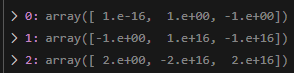

## Часть 2. LU разложение

Задание: 

реализовать алгоритм решения предыдущей задачи с матрицей A2 с помощью LU-разложение В решении должна выводиться L, U и собственно решение системы. 

ВАЖНО: реализация метода LU должна быть получена путем небольшой модификации метода gauss!  При это саму реализацию можно разделить на два метода: один метод собственно находит LU разложение (можно сделать переделкой цикла для матрицы A метода gauss), второй метод - непосредственное решение системы с помощью прямого и обратного хода. Ни в каком виде нельзя пользоваться пакетными методами (в частности, la.solve)

In [30]:
import numpy as np
import numpy.linalg as la
import copy 

def A_to_LU(a):
    n = a.shape[0]
    LU_matrix = np.matrix(np.zeros([n, n]))

    for k in range(n):

        for j in range(k, n):
            LU_matrix[k, j] = a[k, j] - LU_matrix[k, :k] * LU_matrix[:k, j]

        for i in range(k + 1, n):
            LU_matrix[i, k] = (a[i, k] - LU_matrix[i, :k] * LU_matrix[:k, k]) / LU_matrix[k, k]

    return LU_matrix

def LU_to_L(LU_matrix):
    L = LU_matrix.copy()
    for i in range(L.shape[0]):
            L[i, i] = 1
            L[i, i+1:] = 0
    return L

def LU_to_U(LU_matrix):
    U = LU_matrix.copy()
    for i in range(1, U.shape[0]):
            U[i, :i] = 0
    return U

def gauss( A_in, b_in ):
    n = b_in.size
    A = copy.deepcopy(A_in)
    b = copy.deepcopy(b_in)
    for k in range(0,n-1):
        for i in range(k+1,n):
            if A[i,k]!=0:
                c = A[i,k]/A[k,k]
                A[i,k+1:n] = A[i,k+1:n] - c*A[k,k+1:n]
                b[i] = b[i] - c*b[k]
                
    # обратный ход
    for k in range(n-1,-1,-1):
        b[k] = (b[k] - np.dot(A[k,k+1:n],b[k+1:n]))/A[k,k]
    return b


if __name__ == "__main__":
    A = np.array([[2., -1., 0.], [-1., 2., -1.], [0, 1., -1.]])
    b = np.array([1., 0., 0.])

    LU_matrix = A_to_LU(A)
    
    L = LU_to_L(LU_matrix)
    U = LU_to_U(LU_matrix)
    print(L, "\n")
    print(U, "\n")

    v = gauss(L, b)
    u = gauss(U, v)
    print ("u = ", u)


[[ 1.          0.          0.        ]
 [-0.5         1.          0.        ]
 [ 0.          0.66666667  1.        ]] 

[[ 2.         -1.          0.        ]
 [ 0.          1.5        -1.        ]
 [ 0.          0.         -0.33333333]] 

u =  [1. 1. 1.]


### LU - разложение с помощью пакета sympy

Чтобы убедиться, что разложение получено верно, можно воспользоваться скриптом ниже

In [5]:
import sympy as sp

A = sp.Matrix([[2., -1., 0.], [-1., 2., -1.], [0, 1., -1.]])
L, U, _ = A.LUdecomposition()
L

Matrix([
[   1,                 0, 0],
[-0.5,                 1, 0],
[   0, 0.666666666666667, 1]])

In [6]:
U

Matrix([
[2.0, -1.0,                0.0],
[  0,  1.5,               -1.0],
[  0,    0, -0.333333333333333]])

## Часть 3. Нахождение обратной матрицы с помощью LU разложения

Задание:

Предложить алгоритм с использованием LU-разложения и найти обратную матрицу с точностью $\epsilon = 10^{-3}$:
$$
A = \begin{pmatrix} 
1 & 1  & 1 \\
0 & 1 & 2 \\
7 & 1 & 4 \\
\end{pmatrix}
$$
Для необходимых оценок использовать первую норму. Сравнить результат со значением, найденным с помощью функции numpy.linalg.inv.

In [35]:
import numpy as np
import numpy.linalg as la
import copy 

def A_to_LU(a):
    n = a.shape[0]
    LU_matrix = np.matrix(np.zeros([n, n]))

    for k in range(n):

        for j in range(k, n):
            LU_matrix[k, j] = a[k, j] - LU_matrix[k, :k] * LU_matrix[:k, j]

        for i in range(k + 1, n):
            LU_matrix[i, k] = (a[i, k] - LU_matrix[i, :k] * LU_matrix[:k, k]) / LU_matrix[k, k]

    return LU_matrix

def LU_to_L(LU_matrix):
    L = LU_matrix.copy()
    for i in range(L.shape[0]):
            L[i, i] = 1
            L[i, i+1:] = 0
    return L

def LU_to_U(LU_matrix):
    U = LU_matrix.copy()
    for i in range(1, U.shape[0]):
            U[i, :i] = 0
    return U

def L_solve(L, b):
    n = b.size
    x = b.copy()
    
    for k in range(0,n-1):
        for i in range(k+1,n):
            if L[i,k]!=0:
                c = L[i,k]/L[k,k]
                x[i] = x[i] - c*x[k]
    return x

def U_solve(U, b):
    n = b.size
    for k in range(n-1,-1,-1):
        b[k] = (b[k] - np.dot(U[k,k+1:n],b[k+1:n]))/U[k,k]
    return b

def get_A_inv(A, n):
    LU_matrix = A_to_LU(A)
    C = A.copy()
    L = LU_to_L(LU_matrix)
    U = LU_to_U(LU_matrix)
    E = np.eye(n)

    L_inv, U_inv = np.zeros((n,n)),np.zeros((n,n))
    for i in range(n):
        L_inv[i] = L_solve(L, E[i])
        U_inv[i] = U_solve(U, E[i])
    L_inv = L_inv.T
    U_inv = U_inv.T
    A_inv = np.dot(U_inv, L_inv)

    return A_inv


if __name__ == "__main__":
    A = np.array([[1., 1., 1.], [0., 1., 2.], [7, 1., 4.]])

    LU_matrix = A_to_LU(A)
    L = LU_to_L(LU_matrix)
    U = LU_to_U(LU_matrix)

    A_inv1 = get_A_inv(A, np.shape(A)[0])
    A_inv2 = la.inv(A)

    print("Обратная матрица с помощью LU разложения:\n", A_inv1, "\n")
    print("Обратная матрица с помощью numpy.linalg.inv:\n", A_inv2)


Обратная матрица с помощью LU разложения:
 [[ 0.22222222 -0.33333333  0.11111111]
 [ 1.55555556 -0.33333333 -0.22222222]
 [-0.77777778  0.66666667  0.11111111]] 

Обратная матрица с помощью numpy.linalg.inv:
 [[ 0.22222222 -0.33333333  0.11111111]
 [ 1.55555556 -0.33333333 -0.22222222]
 [-0.77777778  0.66666667  0.11111111]]


## Часть 4. Модифицированный метод Гаусса

Модифицировать метод Гаусса из Части 1 так, чтобы система $A_1x = b_1$ решалась корректно. ВАЖНО: реализация метода должна быть получена путем модификации метода gauss, а не переписыванием кода с нуля! 

Реализуем метод Гаусса с выбором главного элемента по столбцу: на $i$-ом шаге в $i$-м столбце выбирается максимальный по модулю элемент и строки переставляются таким образом, чтобы строка с таким элементом оказалась на месте $i$-ой (так легче всего, ведь при перестановске столбцов измененется порядок следования компонент вектора неизвестных и это требует его восстановления по окончании процесса решения)

In [36]:
import numpy as np
import numpy.linalg as la
import copy 

def get_max_index(A, k, n):
    max = 0
    max_i = k
    for i in range (k, n):
        if abs(A[i, k]) >= abs(max):
            max = A[i, k]
            max_i = i
    return max_i


def gauss_upgraded( A_in, b_in ):
    n = b_in.size
    A = copy.deepcopy(A_in)
    b = copy.deepcopy(b_in)
    for k in range(0,n-1):
        k_max = get_max_index(A, k, n)
        if k_max != k:
            A[[k, k_max]] = A[[k_max, k]]
            b[[k, k_max]] = b[[k_max, k]]
        for i in range(k+1,n):
            if A[i,k]!=0:
                c = A[i,k]/A[k,k]
                A[i,k+1:n] = A[i,k+1:n] - c*A[k,k+1:n]
                b[i] = b[i] - c*b[k]
                
    # обратный ход
    for k in range(n-1,-1,-1):
        b[k] = (b[k] - np.dot(A[k,k+1:n],b[k+1:n]))/A[k,k]
    return b

if __name__ == "__main__":
    A1 = np.array([[1e-16, 1., -1.], [-1., 2., -1.], [2., -1., 0.]])
    b1 = np.array([0., 0., 1.])

    A2 = np.array([[2., -1., 0.], [-1., 2., -1.], [1e-16, 1., -1.]])
    b2 = np.array([1., 0., 0.])

    print('mu1 = ', la.cond(A1))
    print('mu2 = ', la.cond(A2))

    print('u1 = ', gauss_upgraded(A1, b1))
    print('u2 = ', gauss_upgraded(A2, b2))


mu1 =  16.393731622284385
mu2 =  16.393731622284392
u1 =  [1. 1. 1.]
u2 =  [1. 1. 1.]
